In [31]:
import os
import sys
import numpy as np
#import scipy.io
#import scipy.misc
#import tensorflow as tf  # Import TensorFlow after Scipy or Scipy will break
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline
import random


In [32]:
import requests
import json

In [33]:
def emotion_generator(CONTENT):
    
    json_resp = requests.post( 'https://api-face.sightcorp.com/api/detect/',
                  data  = { 'app_key' : '8e0ffe9fb7e141189830b8b15169262f' },
                  files = { 'img'     : ( 'filename', open( CONTENT, 'rb' ) ) } )
    x = json_resp.json()
    try:
        emotion = x['people'][0]['emotions']
    except:
        return 'neutral'
    
    c = 0
    for a,b in emotion.items():
        if b>c:
            c = b
            d = a
    if c < 30:
        return 'neutral'
    happy = ['happiness', 'surprise']
    if d in happy:
        return 'happy'
    else:
        return 'sad'

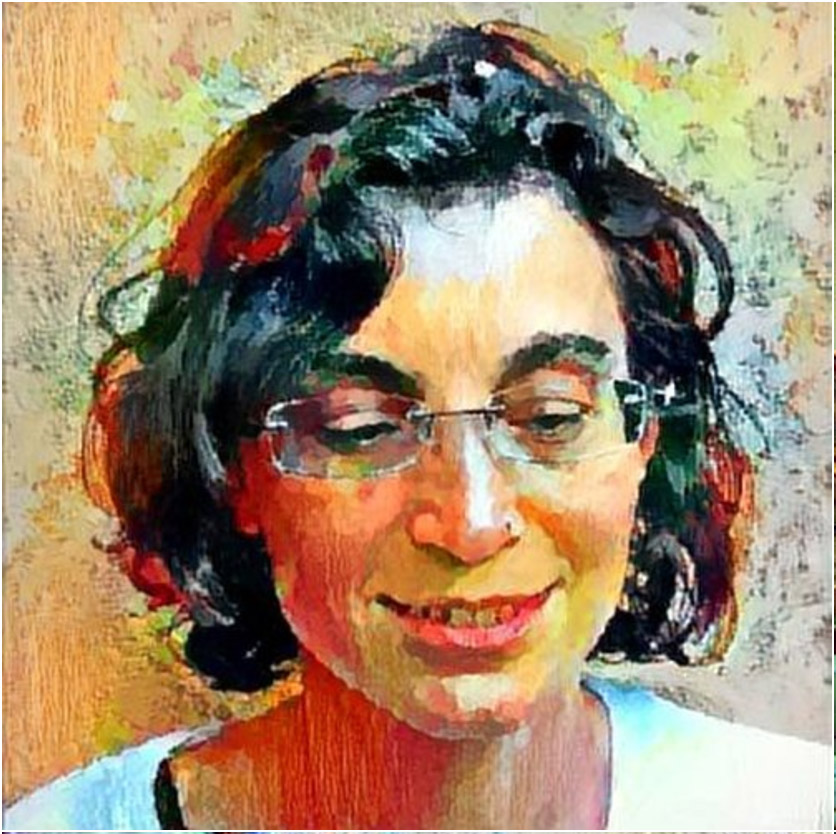

In [29]:
CONTENT = 'images/gurney.jpg'

image2 = Image.open(CONTENT)
image2

In [4]:
def dominating_colour(CONTENT):
    image = Image.open(CONTENT)
    w, h = image.size
    pixels = image.getcolors(w * h)

    most_frequent_pixel = pixels[0]

    for count, colour in pixels:
        if count > most_frequent_pixel[0]:
            most_frequent_pixel = (count, colour)

    #compare("Most Common", image, most_frequent_pixel[1])
    colour_tuple = [None, None, None]
    for channel in range(3):

          # Get data for one channel at a time
          pixels = image.getdata(band=channel)

          values = []
          for pixel in pixels:
              values.append(pixel)

          colour_tuple[channel] = sum(values) / len(values)
    p = list(most_frequent_pixel[1])
    m = [0,0,0]
    for i in range(0,3):
        m[i] = (max(p[i], colour_tuple[i]))
    return m
            
            
            

In [6]:
print(dominating_colour(CONTENT))

[118.58940124511719, 119.15647506713867, 73.79074478149414]


In [7]:
def happy_generator():
    x = [0,0,0]
    for i in range(3):
        x[i] = random.randrange(28,200)
    
    return x

print(happy_generator())

def sad_generator():
    x = [0,0,0]
    x[0] = random.randrange(180,255) 
    x[1] = random.randrange(150,255) 
    x[2] = random.randrange(130,255) 
    
    
    return x
print(sad_generator()) 
        


[99, 186, 70]
[245, 164, 130]


In [55]:
#CONTENT = 'images/ronaldo.jpg'
#CONTENT = 'images/baby.png'
#CONTENT = 'images/gurney.jpg'
#CONTENT = 'images/kiddo.jpg'

def happy_image_generator(CONTENT):
    a,b,c = dominating_colour(CONTENT)
    d,e,f = happy_generator()
    print(d,e,f)
    image2 = Image.open(CONTENT)
    pixels = image2.load()
    print(int(abs(d-a)),int(abs(b-e)),int(abs(f-c)))
    for i in range(image2.size[0]):    # for every col:
        for j in range(image2.size[1]):# For every row
            lst = list(pixels[i,j])
            lst[0] += int(abs(d-a/6+i/20))
            lst[1] += int(abs(b/5-e/2-j/10))
            lst[2] += int(abs(f-c + (i+j)/24))
            pixels[i,j] = tuple(lst)
            #pixels[i,j] = (i,j,100)
    return image2




In [56]:
from PIL import ImageEnhance

In [57]:
#CONTENT = 'images/ronaldo.jpg'
#CONTENT = 'images/baby.png'
#CONTENT = 'images/gurney.jpg'
#CONTENT = 'images/kiddo.jpg'
#CONTENT = 'images/outputs.png'
def sad_image_generator(CONTENT):
    a,b,c = dominating_colour(CONTENT)
    d,e,f = sad_generator()

    print(d,e,f)
    image2 = Image.open(CONTENT)
    pixels = image2.load()
    print(int(abs(d-a)),int(abs(b-e)),int(abs(f-c)))
    for i in range(image2.size[0]):    # for every col:
        for j in range(image2.size[1]):# For every row
            lst = list(pixels[i,j])
            lst[0] += int(abs(d/5-a/3+i/15))
            lst[1] += int(abs(b/5-e/3-j/10))
            lst[2] += int(abs(f/2-c/3 + (i/2+j)/24))
            pixels[i,j] = tuple(lst)
            #pixels[i,j] = (i,j,100)/

    check = ImageEnhance.Color(image2).enhance(0.4)
    check2 = ImageEnhance.Brightness(check).enhance(0.9)


    return check2



In [67]:
def final_image(CONTENT):
    if(emotion_generator(CONTENT) == 'happy'):
        return happy_image_generator(CONTENT)
    elif (emotion_generator(CONTENT) == 'sad'):
        return sad_image_generator(CONTENT)
    elif(emotion_generator(CONTENT) == 'neutral'):
        return Image.open(CONTENT)


In [73]:
emotion_generator('images/gurney.jpg')

'happy'

107 101 147
143 150 99


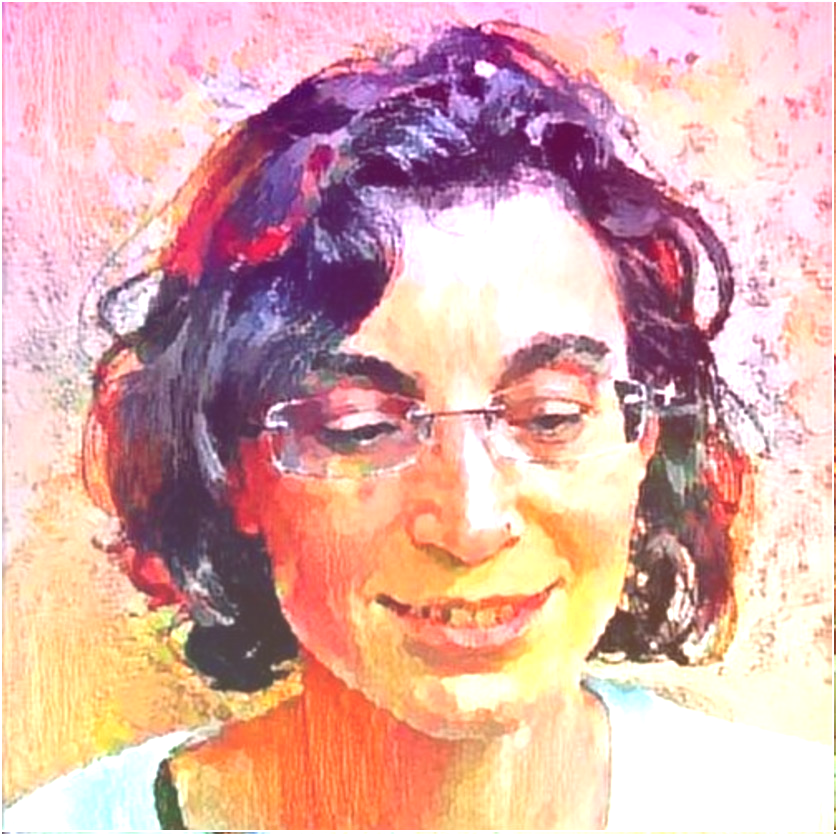

In [72]:
final_image('images/gurney.jpg')
